Practial 11 : For an image classification challenge, create and train a ConvNet in Python using TensorFlow. Also,
try to improve the performance of the model by applying various hyperparameter tuning to reduce
the overfitting or underfitting problems that might occur. Maintain graphs of comparisons.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding
y_train, y_test = y_train.flatten(), y_test.flatten()

In [3]:
def create_model(dropout_rate=0.3):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [5]:
model = create_model(dropout_rate=0.3)
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

C:\Users\Vaishali Pawar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Vaishali Pawar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.2733 - loss: 1.9430 - val_accuracy: 0.4914 - val_loss: 1.3926
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.4495 - loss: 1.5243 - val_accuracy: 0.5385 - val_loss: 1.2769
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.4947 - loss: 1.4018 - val_accuracy: 0.5755 - val_loss: 1.1814
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.5339 - loss: 1.3047 - val_accuracy: 0.5844 - val_loss: 1.1687
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.5554 - loss: 1.2502 - val_accuracy: 0.6212 - val_loss: 1.0654
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 152ms/step - accuracy: 0.5755 - loss: 1.1960 - val_accuracy: 0.6434 - val_loss: 1.0017
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.5900 - loss: 1.1547 - val_accuracy: 0.6334 - val_loss: 1.0313
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.6037 - 

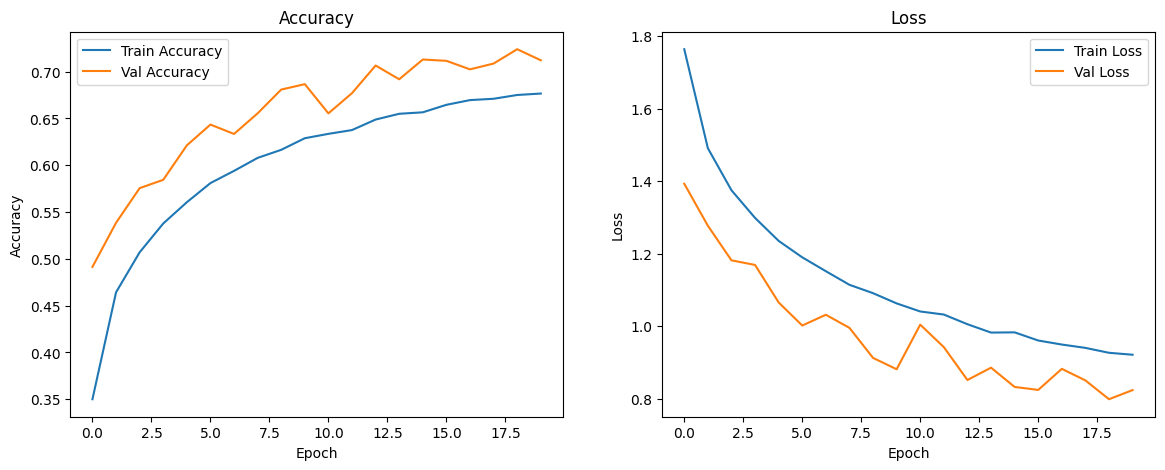

In [6]:
def plot_metrics(history, title_suffix=''):
    plt.figure(figsize=(14, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss' + title_suffix)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_metrics(history)